---
# <center> **An Introduction to Data Science**
## <center> Spring 2024

### <center> **Prof. Bahram Mobasher**
### Teaching Assistant: **Sina Taamoli** | email: *sina.taamoli@email.ucr.edu*
### [Course webpage](https://github.com/sinataamoli/Applied-Data-Science)
#### Week 8 (May 23th): MCMC
---

## Marcov Chain Monte Carlo (MCMC) <br>
In simple Bayesian problems with a small number of parameters, it is possible to compute the exact form of the posterior distribution, but in the real problems due to a large number of parameters, calculations get complicated. MCMC is the class of algorithms for sampling from a probability distribution (e.g. posterior). In other words, we want to sample the probability distribution such that the chance of sampling each point is proportional to the true distribution.

Let's look into a very simple example. Imagine that the weather condition (Sunny(S) or Rainy(R)) of day n only depends on the weather condition of day n-1.
And also the following conditional probabilities are given:

$P(S_{n+1} | S_{n}) = 90\%$ <br>
$P(R_{n+1} | S_{n}) = 10\%$ <br>
$P(S_{n+1} | R_{n}) = 50\%$ <br>
$P(R_{n+1} | R_{n}) = 50\%$ 

We want to find the probability of sunny and rainy weather. If you remember the linear algebra part of the course and our example in session 2, given the initial state of the system [S R] (for example [1 0] for sunny day) then the prediction for next day is:

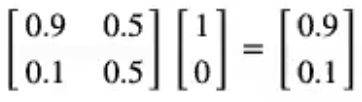

And the final state regardless of initial condition converges to the eigenvector (X) of transition matrix:

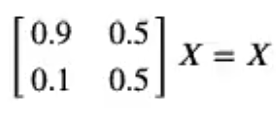

Finding eigenvector we know that the probability of sunny weather regardless of the initial condition is 83.3% and rainy weather is 16.6%.

In [50]:
import numpy as np

T = np.array([[0.9, 0.5], [0.1, 0.5]])
Eigenvector = np.linalg.eig(T)[1][:, 0]
Eigenvector

array([0.98058068, 0.19611614])

In [51]:
Eigenvector / np.sum(Eigenvector)

array([0.83333333, 0.16666667])

Use MCMC to solve the problem. Consider an initial weather condition. For example Sunny (S), then generate a random uniform number between 0 and 1, if the number less than 0.9, stay at the same state "S", otherwise jump to "R*. If you are on "R" state, if the number is less than 0.5, stay at "R", otherwise jump to "S". Repeat the procedure for a large number of times and then the fraction of "R" shows the probability of rainy and the fraction of "S" shows the probability of sunny weather.

In [52]:
def State(state_i):

    rand = np.random.rand()
    if state_i == "S":
        if rand > 0.9:
            State_f = "R"
        else:
            State_f = "S"

    if state_i == "R":
        if rand > 0.5:
            State_f = "S"
        else:
            State_f = "R"

    return State_f

In [53]:
Outcome = ["S"]
for N in range(100000):
    Outcome.append(State(Outcome[-1]))

In [54]:
Outcome[-10:]

['R', 'R', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

In [55]:
PS = Outcome.count("S") / len(Outcome)
PS

0.8357116428835711

In [56]:
PR = Outcome.count("R") / len(Outcome)
PR

0.16428835711642883

1) Initialize all the variables ($theta$) and number of itrations n

### for n iterations

2) Find the posterior at point $\theta$

3) Define a reasonable function to move from $\theta$ to $\theta'$

4) Find $r = \frac{\text{Posterior} (\theta')}{\text{Posterior} (\theta)}$

5) Generate a uniform random number(rand) between 0, 1

6) if r>rand, then move to new point $\theta'$, otherwise, stay in the same point

In [57]:
def MCMC(log_Posterior, data, initial, step_cov, n_iteration):
    
    param1 = np.array(initial)
    sample = np.array(initial)
    
    for j in range (n_iteration):
        log_Posterior_i = log_Posterior(data, param1)
        # Update the location 
        param2 = np.random.multivariate_normal(param1, step_cov)
        # find the new posterior
        log_Posterior_f = log_Posterior(data, param2)
        # Generate a random number between 0, 1
        rand = np.random.rand()
        
        if log_Posterior_f-log_Posterior_i > np.log(rand):
            sample = np.vstack((sample, param2))
            param1 = param2[:]
            
        else:
            sample = np.vstack((sample, param1))
            
    return sample

In [58]:
import pandas as pd

data = pd.read_csv('tweet_counts.csv')

In [59]:
data.head()

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


In [60]:
k = data['count'].values
w = data['week'].values

In [61]:
alpha = 1 / np.mean(k)

In [62]:
Poisson = lambda k, lamb: (lamb**k) / np.math.factorial(k) * np.exp(-lamb)

In [63]:
def log_posterior(data, param):
    k, w = data
    lamb1, lamb2, W_s = param
    
    P = 0
    
    for i in k[w < W_s]:
        P = P + np.log(Poisson(i, lamb1) * alpha * np.exp(-alpha * lamb1))
        
    for j in k[w > W_s]:
        P = P + np.log(Poisson(i, lamb2) * alpha * np.exp(-alpha * lamb2))
        
    return P

In [64]:
len(w)

52

In [69]:
D = MCMC(log_posterior, data = [k, w], initial = [25, 30, 30], step_cov = [[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.5]], n_iteration = 30000)

---
# <center> **An Introduction to Data Science**
## <center> Spring 2024

### <center> **Prof. Bahram Mobasher**
### Teaching Assistant: **Sina Taamoli** | email: *sina.taamoli@email.ucr.edu*
### [Course webpage](https://github.com/sinataamoli/Applied-Data-Science)
#### Week 9 (May 30th): MCMC - 2 | Support Vector Machine (SVM)
---

In [66]:
import matplotlib.pyplot as plt

In [70]:
D

array([[25.        , 30.        , 30.        ],
       [25.        , 30.        , 30.        ],
       [25.        , 30.        , 30.        ],
       ...,
       [34.8863652 , 34.17645356, 32.24695733],
       [34.8863652 , 34.17645356, 32.24695733],
       [34.8863652 , 34.17645356, 32.24695733]])

Text(0, 0.5, '$\\lambda_2$')

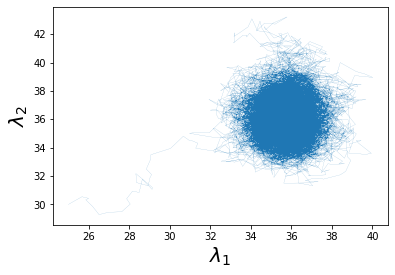

In [79]:
plt.plot(D.T[0], D.T[1], linewidth = 0.1)
plt.xlabel('$\lambda_1$', fontsize = 20)
plt.ylabel('$\lambda_2$', fontsize = 20)

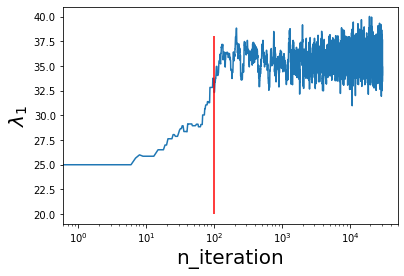

In [75]:
plt.plot(D.T[0])
plt.xlabel('n_iteration', fontsize = 20)
plt.ylabel('$\lambda_1$', fontsize = 20)
plt.xscale('log')
plt.vlines(100, 20, 38, color = 'red')

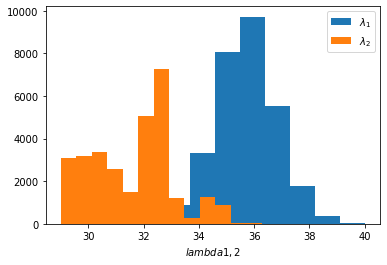

In [82]:
plt.hist(D.T[0][200:], label = '$\lambda_1$')
plt.hist(D.T[2][200:], bins = 14, label = '$\lambda_2$')
plt.xlabel('$lambda 1,2$')
plt.legend()

In [83]:
print('mean λ1 is', np.median(D.T[0][200:]))
print('mean λ2 is', np.median(D.T[1][200:]))

mean λ1 is 35.70558885900711
mean λ2 is 35.84723721978519


## Support Vector Machine (SVM)

SVM is a supervised algorithm which can be used for classification and regression. However, it is originally proposed for binary classification.

Given a dataset ($\vec{\mathbf{x}}$ or $\vec{\mathbf{\phi(x)}}$  ) which are labeled with $y_i \in\{-1,1\}$, we want to find a linear separator with the largest margin between these two types of data. The distance of any point (vector) from a line/plane can be obtained by the projection of that point on the unit normal vector of the line/plane ($\hat{w}$).

$$D_i=\hat{w}.\vec{\mathbf{x_i}}+b$$

![Screenshot 2024-05-30 at 12.18.17 PM.png](<attachment:Screenshot 2024-05-30 at 12.18.17 PM.png>)
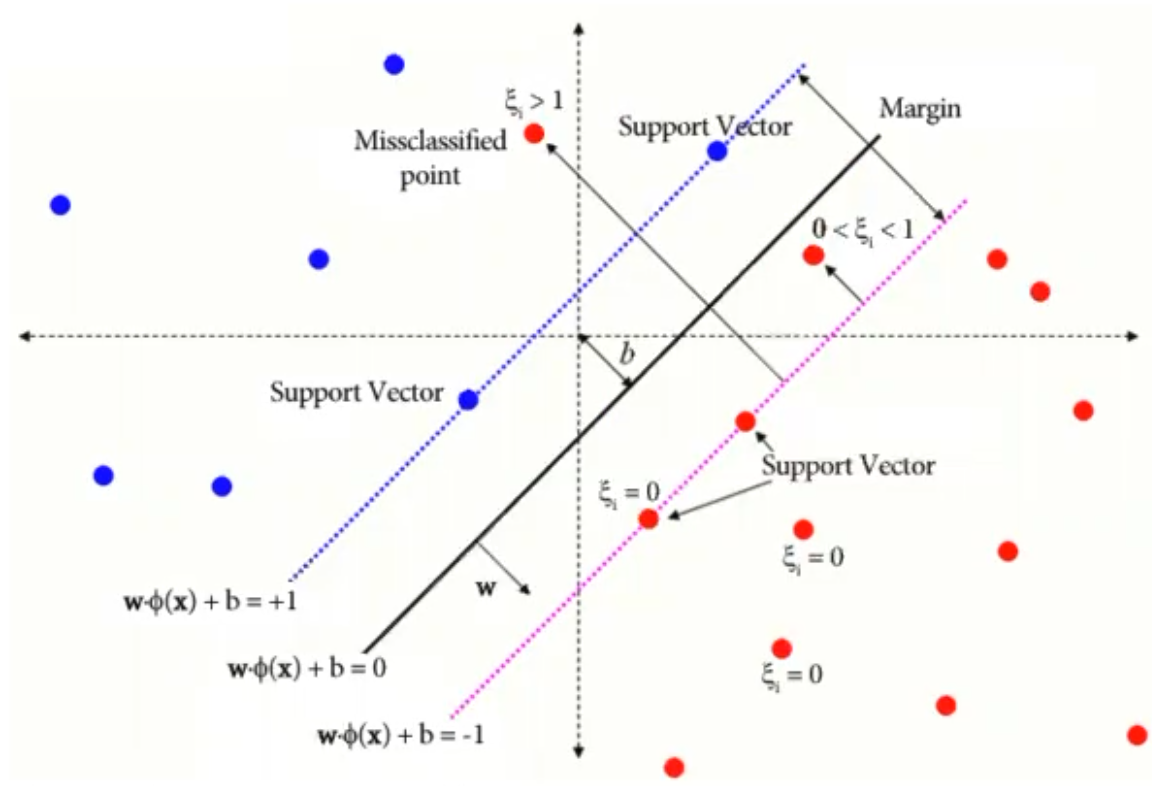

So, if $D>0$ then we are in the blue zone of the figure below and if $D<0$ then we are in the red zone. It's our decision rule. The problem is to find optimal $\hat{w}$ and $b$.

<img src="fig/SVM_margin.png" width="600">
Source of the figure:https://svm.michalhaltuf.cz/support-vector-machines

To find the optimal seperator line, let's consider a margin between our training sample such that:

$$\vec{w}.x_{blue}+b\geq 1$$
$$\vec{w}.x_{red}+b\leq -1$$

Note that I removed the hat sign from $w$ since it is not a unit vector anymore. We multiplied ($\hat{w}.\vec{\mathbf{x_i}}+b\geq$ arbitrary margin) by (1/arbitrary margin). If you define label such that $y_i=-1$ for reds and $y_i=1$ for blues, then: 

$$y_i(\vec{w}.\vec{\mathbf{x_i}}+b)-1\geq 0$$

It gives us two boundaries: Blue: $\vec{w}.\vec{\mathbf{x_i}}+b=1$ ; Pink: $\vec{w}.\vec{\mathbf{x_i}}+b=-1$

The margin size can be computed using two support vectors, one on blue dashed line and the other on pink dashed line. 

$$\text{Margin}=(\vec{x}_{\text{on blue dashed line}}-\vec{x}_{\text{on pink dashed line}}).\frac{\vec{w}}{||w||}=(1-b-(-1-b))\frac{1}{||w||}=\frac{2}{||w||}$$

To get the optimal seperator we want to maximize the margin. So, we are going to maximize $\frac{2}{||w||}$ or minimize $||w||$. We know that $||w||$ is $\sqrt{\vec{w}.\vec{w}}$. Therefore, we can minimize $\frac{1}{2}||w||^2=\frac{1}{2}\vec{w}.\vec{w}$ which is computationally convenient. 

So, we can solve the following optimization problem:

$$min\ (\frac{1}{2}w^T.w)$$

$$\text{subject to:   } y_i({w}.{\mathbf{x_i}}+b)-1\geq 0 $$

Is that all? Not yet! Imagine we have some outliers (red points in blue region). In the above expression for optimization problem we did not take into account a level of tolerance for those outliers. We can consider this by defining a slack parameter ($\xi$)

$$min\ (\frac{1}{2}w^T.w+C\sum_i \xi_i)$$

$$\text{subject to:   } y_i({w}.{\mathbf{x_i}}+b)\geq 1-\xi_i \text{    and      } \xi_i \geq 0$$ 

To incorporate all the constraints, we can write the following Lagrangian and minimize it:

$$L=\frac{1}{2}w^T.w+C\sum_i \xi_i+\sum_i\alpha_i[1-\xi_i-y_i({w}.{\mathbf{x_i}}+b)]+\sum_i\eta_i(-\xi_i)$$

To minimize the Lagrangian, take the first derivative of the function and put that equal to zero.

$$\frac{\partial L }{\partial w}=w-\sum_i \alpha_i y_i{\mathbf{x_i}}=0 \Rightarrow w=\sum_i \alpha_i y_i{\mathbf{x_i}} $$

$$\frac{\partial L }{\partial b}=\sum_i \alpha_i y_i=0$$

$$\frac{\partial L }{\partial \xi_i}=C-\alpha_i-\eta_i=0$$

Since $\eta_i\geq 1$, it implies that $\alpha_i\leq C$.

Let's substitute $w=\sum_i \alpha_i y_i{\mathbf{x_i}}$ in the Lagrangian equation.

$$L=\sum_{i}\alpha_i-\frac{1}{2}\sum_i\sum_j \alpha_i \alpha_j y_i y_j (\vec{\mathbf{x_i}}.\vec{\mathbf{x_j}}) $$

And the constraints are:

$$(1):\ \sum_i \alpha_i y_i=0$$

$$(2):\ 0 \leq \alpha_i \leq C$$

If we define: $q=(1\ 1\ 1\ ... \ 1)$ and $P_{ij}=y_i y_j (\vec{\mathbf{x_i}}.\vec{\mathbf{x_j}})$, then:

$$max_{\alpha}(q^T\alpha-\frac{1}{2}\alpha^T P\alpha)$$

$$y^T\alpha=0$$

$$0 \leq \alpha_i \leq C$$

So, building an SVM model can be done by solving the above optimization problem.

We will use "cvxopt" package in Python to perform the optimization:

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from sklearn.datasets import make_blobs

Let's create a pseudo dataset:

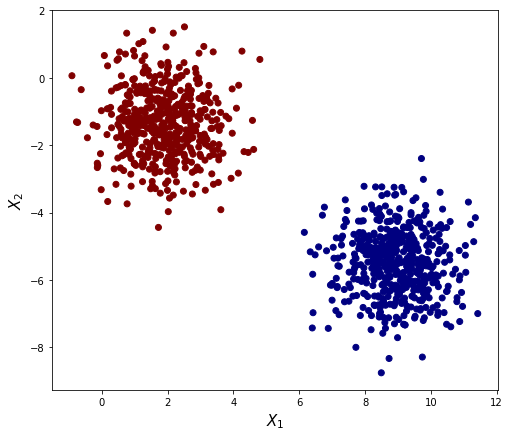

In [89]:
plt.figure(figsize=(8,7))
X,y=make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1,random_state=200)
plt.scatter(X[:,0],X[:,1],c=y,cmap='jet')
plt.xlabel('$X_1$',fontsize=15)
plt.ylabel('$X_2$',fontsize=15)
plt.show()

Data are labeled with 0 and 1. To be consistent with our notation, we will map 0s to -1.

In [90]:
y[y==0]=-1

In [93]:
help(opt.solvers.qp)

Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
    
    
    Output arguments (default solver).
    
        Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
        'primal ob

As you can see from the data above, we can define a seperator line without outliers. So, we will define C as infinite (e.g. $10^{10}$) (hard margin)